## Case Study Part 2

### Section 3: Running Random Simulations in NumPy

3.1 Simulating random coin flips and die rolls using NumPy

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import product

In [256]:
die_roll = np.random.randint(1,7)
assert 1 <= die_roll <= 6

In [257]:
np.random.seed(0)
die_roll = [np.random.randint(1,7) for _ in range(3)]
assert die_roll == [5, 6, 1]

In [258]:
np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [259]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads: {freq_heads}")

Frequency of Heads: 0.8


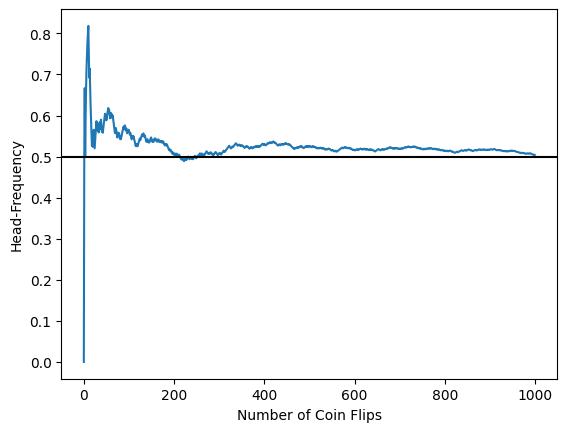

In [260]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color = 'k')
plt.xlabel("Number of Coin Flips")
plt.ylabel("Head-Frequency")
plt.show()

In [261]:
np.random.seed(0)
print("Let's flip the biased coin once.")
coint_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print((f"{head_count} heads were observed out of " f"{number_coin_flips} biased coin flips."))

Let's flip the biased coin once.
Biased coin landed on tails.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips.


In [262]:
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [263]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


3.2 Computing confidence intervals using histograms and NumPy arrays

In [264]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [265]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [266]:
assert head_count_array.tolist() == head_count_list

In [267]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

In [268]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))

In [269]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [270]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


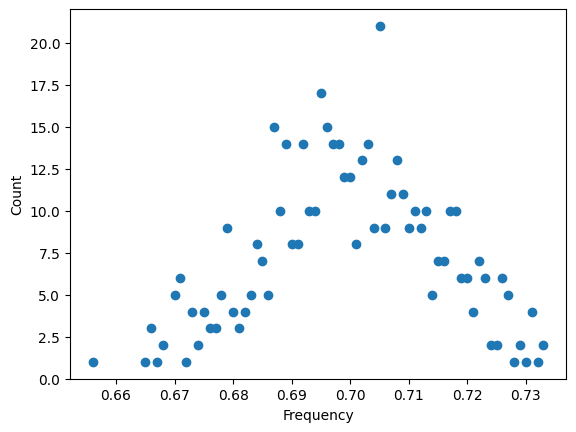

In [271]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

3.2.1 Binning similar points in histogram plots

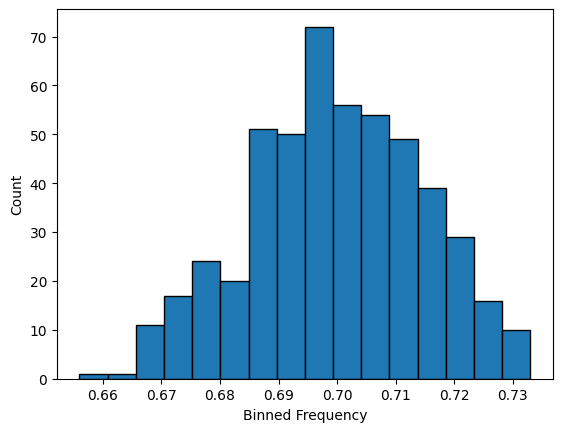

In [272]:
plt.hist(frequency_array, bins = 'auto', edgecolor = 'black')
plt.xlabel("Binned Frequency")
plt.ylabel("Count")
plt.show()

Number of Bins: 16


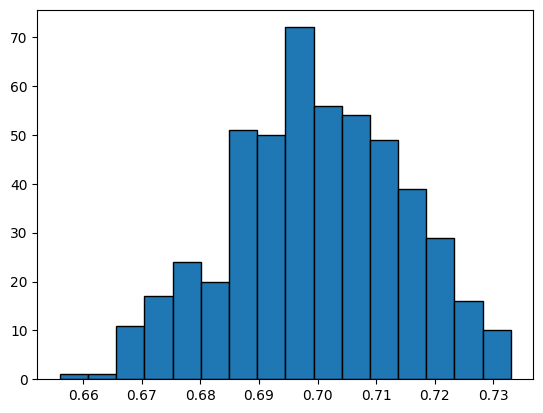

In [273]:
counts, _, _ = plt.hist(frequency_array, bins = 'auto', edgecolor = 'black')

print(f"Number of Bins: {counts.size}")

Bin width: 0.004812499999999997


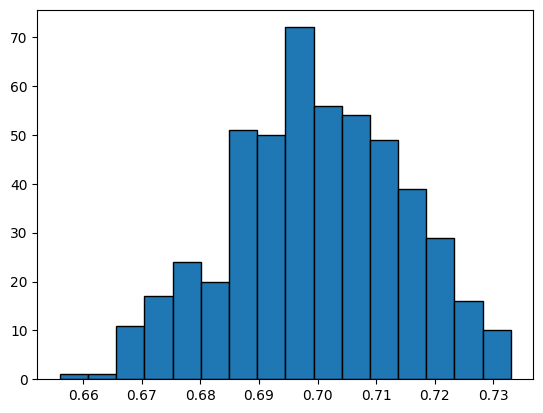

In [274]:
counts, bin_edges, _ = plt.hist(frequency_array, bins = 'auto', edgecolor = 'black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [275]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i + 1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains " f"{count} element{'' if count == 1 else 's'}."))
    
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element.
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements.


In [276]:
assert counts[counts.argmax()] == counts.max()

In [277]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements.


3.2.2 Deriving probabilities from histograms

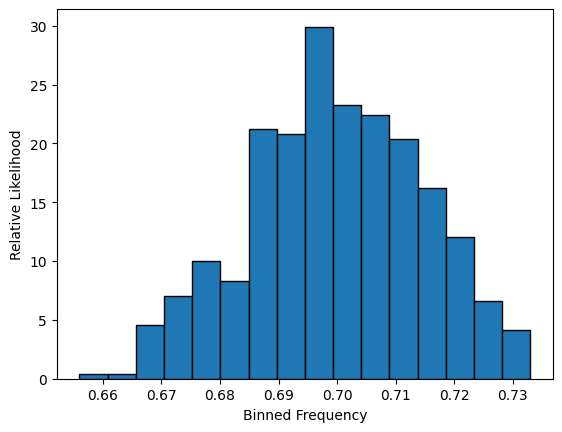

In [278]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins = 'auto', edgecolor = 'black', density = True)

plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

In [279]:
assert likelihoods.sum() * bin_width == 1.0

In [280]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index + 1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}.")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144.


In [281]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index : end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}.")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464.


In [282]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        
        area = likelihoods[start_index : end_index + 1].sum() * bin_width
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "f"{100 * area:.2f}% confidence interval."))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval.


(3, 14)

3.2.3 Shrinking the range of a high confidence interval

In [283]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval.


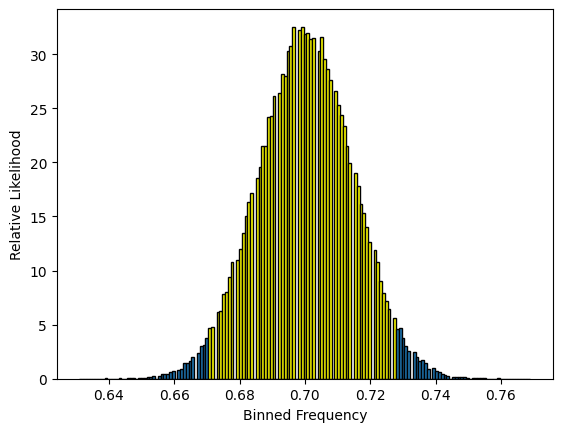

In [284]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins = 'auto', edgecolor = 'black', density = True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")

plt.show()

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval.


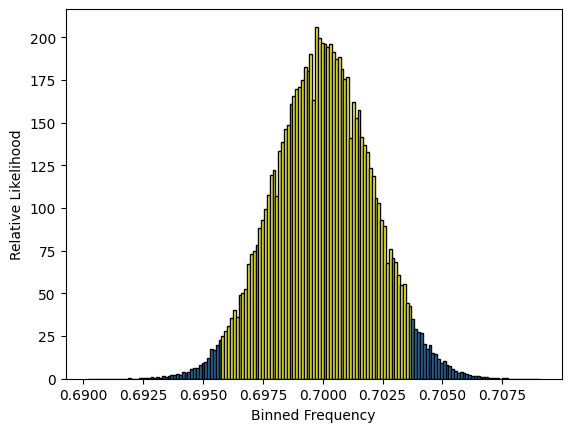

In [285]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins = 'auto', edgecolor = 'black', density = True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")

plt.show()

3.3 Using confidence intervals to analyze a biased deck of cards

In [286]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

In [287]:
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

In [288]:
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

def compute_event_probability(event_condition, generic_sample_space): 
    event = get_matching_event(event_condition, generic_sample_space) 
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [289]:
weighted_sample_space = {'red_card': red_card_count, 'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)

In [290]:
assert prob_red == red_card_count / total_cards

In [291]:
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}.")

The first card in the shuffled deck is red.


In [292]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


In [293]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins = 'auto', density = True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval.


In [294]:
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}.")

The number of red cards in the deck is between 44 and 44.


In [295]:
if red_card_count == 44:
    print('We are correct! There are 44 red cards in the deck.')
else:
    print('Oops! Our estimation was wrong.')

We are correct! There are 44 red cards in the deck.


3.4 Using permutations to shuffle cards

In [296]:
np.random.seed(0)
card_deck = [1,1,0,0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


In [297]:
np.random.seed(0)
unshuffled_deck = [1,1,0,0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1,1,0,0]
print(shuffled_deck)

[0 0 1 1]


In [298]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


In [299]:
for permutation in list(itertools.permutations([0,1,2,3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


In [300]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


In [301]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


In [302]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements.")

Sample space for a 10-card deck contains 252 elements.


### Section 4: Case Study 1 Solution

4.1 Predicting red cards in a Shuffled Deck

In [303]:
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

In [304]:
np.random.seed(0)
shuffled_deck = np.random.permutation(unshuffled_deck)
print(shuffled_deck)

[0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0]


In [305]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1],1):

    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    if remaining_red_cards / remaining_total_cards > 0.5:
        break

print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 1.
The next card in the deck is red.
We have won!


In [306]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red = 0.5, shuffled_deck = None, return_index = False):
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)
    
    remaining_red_cards = total_red_cards
    
    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        remaining_total_cards = total_cards - i - 1
        if remaining_red_cards / remaining_total_cards > min_fraction_red:
            break
    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

4.1.1 Estimating the probability of strategy success

In [307]:
observations = np.array([execute_strategy() for _ in range(1000)])

In [308]:
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.511


In [309]:
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit:.2f}")

Total profit is $22.00


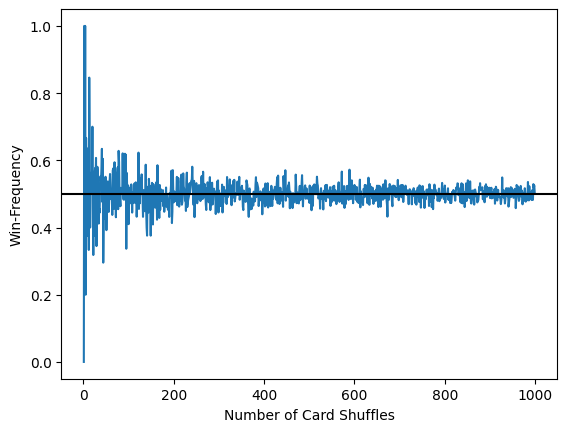

The win-frequency for 10,000 shuffles is 0.5035035035035035


In [310]:
np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy() for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color = 'k')
plt.xlabel("Number of Card Shuffles")
plt.ylabel("Win-Frequency")
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

The frequency range 0.488938 - 0.509494 represents a 97.00% confidence interval.


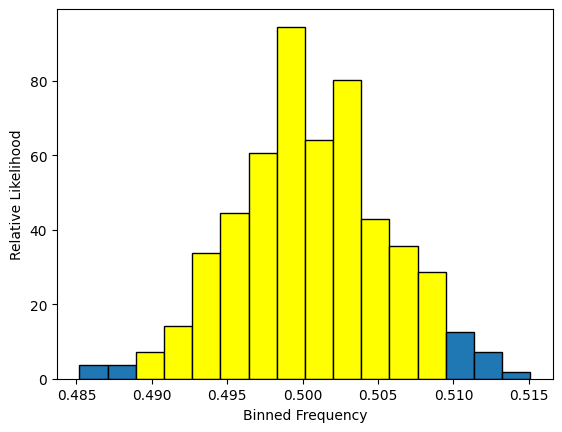

In [311]:
np.random.seed(0)
frequency_array = np.array([repeat_game(10000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins = 'auto', edgecolor = 'black', density = True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")

plt.show()

In [312]:
np.random.seed(0)

frequency_array = np.array([repeat_game(50) for _ in range(300)])
likelihoods, bin_edges = np.histogram(frequency_array, bins = 'auto', density = True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.329333 - 0.652000 represents a 98.00% confidence interval.


(1, 12)

In [313]:
# np.random.seed(0)
# def repeat_game(number_repeats, min_red_fraction):
#     observations = np.array([execute_strategy(min_red_fraction) for _ in range(number_repeats)])
#     return observations.mean()

# frequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])
# likelihoods, bin_edges = np.histogram(frequency_array, bins = 'auto', density = True)
# bin_width = bin_edges[1] - bin_edges[0]
# compute_high_confidence_interval(likelihoods, bin_width)

4.2 Optimizing strategies using the sample space for a 10-card deck

In [314]:
total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"Probability of a win is {prob_win}")

Probability of a win is 0.5


In [315]:
def scan_strategies():
    fractions = [value / 100 for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac, shuffled_deck=np.array(x))
        probabilities.append(compute_event_probability(win_condition, sample_space))
    
    return fractions, probabilities

probabilities = scan_strategies()
print(f"Lowest probability of a win is {min(probabilities)}")
print(f"Highest probability of a win is {max(probabilities)}")

Lowest probability of a win is [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Highest probability of a win is [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]


In [316]:
for total_cards in [2,4,6,8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
    
    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
        print(f"No winning strategy found for deck of size {total_cards}.")
    else:
        print(f"Winning strategy found for deck of size {total_cards}.")

Winning strategy found for deck of size 2.
Winning strategy found for deck of size 4.
Winning strategy found for deck of size 6.
Winning strategy found for deck of size 8.


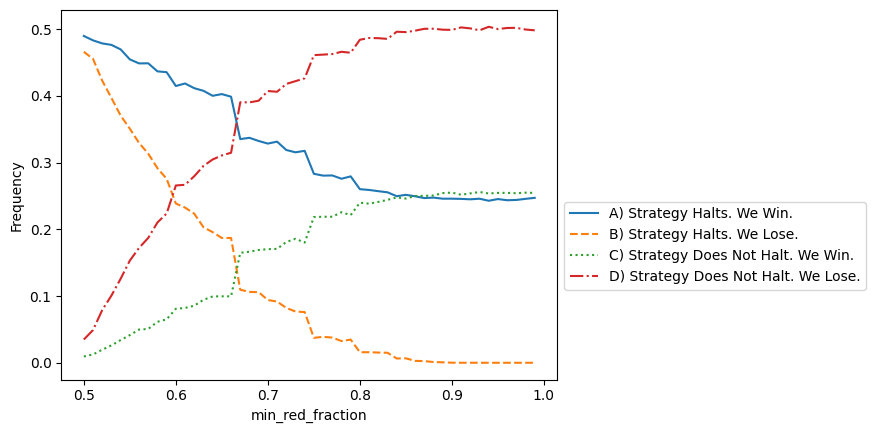

In [317]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):
    observations = [execute_strategy(min_red_fraction, return_index=True) for _ in range(number_repeats)]
    successes = [index for index, card, in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success
    
    failures = [index for index, card in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])

plt.plot(fractions, result_types[0], label = 'A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--', label = 'B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':', label = 'C) Strategy Does Not Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.', label = 'D) Strategy Does Not Halt. We Lose.')
plt.xlabel("min_red_fraction")
plt.ylabel("Frequency")
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

In [318]:
def optimal_strategy(shuffled_deck):
    return shuffled_deck[0]